In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('teams.csv')
df.shape

(2014, 9)

In [ ]:
df.head()

In [4]:
train, test = train_test_split(df, test_size=0.2, random_state=1)

In [5]:
predictors = ["athletes", "events"]
target = "medals"

In [6]:
X = train[predictors].copy()
y = train[[target]].copy()

In [7]:
x_mean = X.mean()
x_std = X.std()

In [8]:
X = (X - x_mean) / x_std
X["intercept"] = 1
X = X[["intercept"] + predictors]
X

,intercept,athletes,events
1322,1,-0.537596,-0.612308
1872,1,0.350420,0.898552
953,1,-0.553313,-0.653142
1117,1,-0.569030,-0.693976
1993,1,-0.246829,-0.224384
...,...,...,...
1791,1,-0.270405,-0.224384
1096,1,-0.301839,-0.265219
1932,1,5.065546,4.267361
235,1,-0.482586,-0.510223


In [9]:
X.describe()

,intercept,athletes,events
count,1611.0,1.611000e+03,1.611000e+03
mean,1.0,-2.370681e-17,-9.923781e-18
std,0.0,1.000000e+00,1.000000e+00
min,1.0,-5.768883e-01,-7.143930e-01
25%,1.0,-5.297371e-01,-6.123079e-01
50%,1.0,-4.197174e-01,-4.489717e-01
75%,1.0,-2.679027e-02,1.839560e-01
max,1.0,6.008571e+00,4.634867e+00


In [10]:
lambda_val = 2
I = np.identity(X.shape[1])
penalty = lambda_val * I
penalty[0][0] = 0
penalty

array([[0., 0., 0.],
       [0., 2., 0.],
       [0., 0., 2.]])

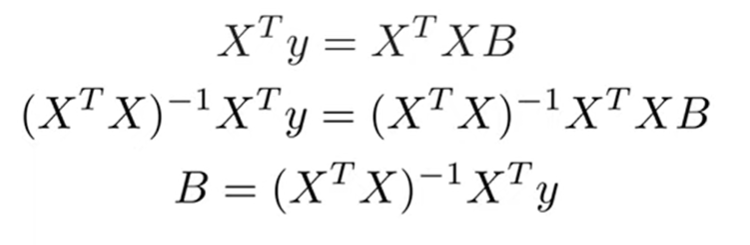

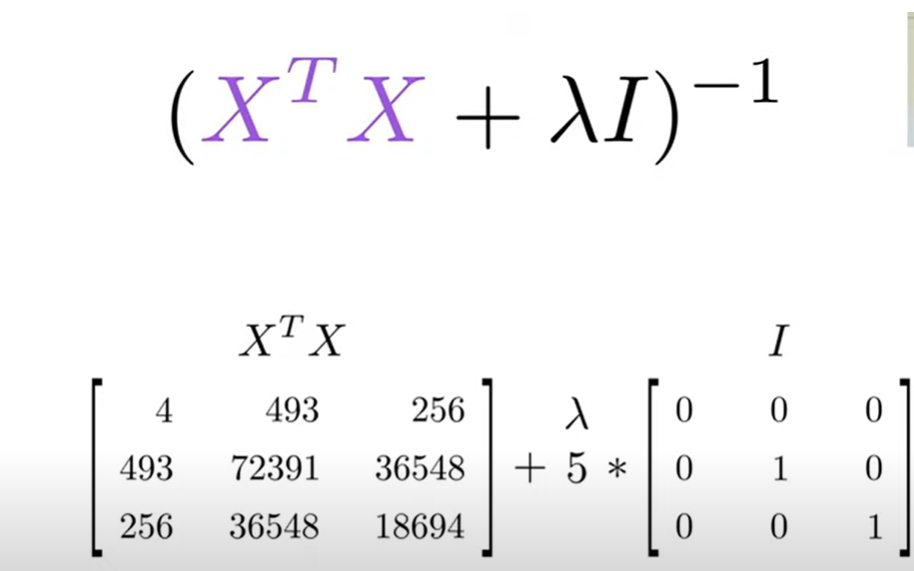

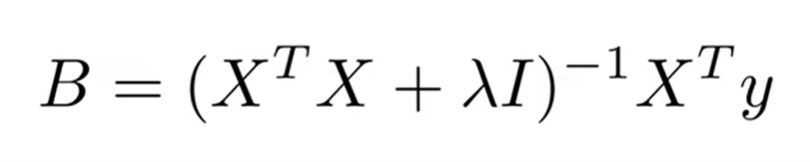

In [11]:
B = np.linalg.inv(X.T @ X + penalty) @ X.T @ y
B.index = ["intercept", "athletes", "events"]
B

,medals
intercept,10.691496
athletes,61.857734
events,-34.632920


In [12]:
test_X = test[predictors]
test_X = (test_X - x_mean) / x_std
test_X["intercept"] = 1
test_X = test_X[["intercept"] + predictors]

In [13]:
def ridge_predict(test, predictors, x_mean, x_std, B):
    test_X = test[predictors]
    test_X = (test_X - x_mean) / x_std
    test_X["intercept"] = 1
    test_X = test_X[["intercept"] + predictors]

    predictions = test_X @ B
    return predictions

In [14]:
predictions = ridge_predict(test, predictors, x_mean, x_std, B)
predictions

,medals
309,-0.914959
285,12.782156
919,-1.799893
120,1.337116
585,-3.744014
...,...
541,1.294285
1863,-6.130765
622,-6.352080
1070,-0.472980


In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=lambda_val)

In [16]:
ridge.fit(X[predictors], y)

Ridge(alpha=2)

In [91]:
ridge.intercept_, ridge.coef_

(array([10.69149597]), array([[ 61.85773366, -34.63292036]]))

In [19]:
sklearn_predictions = ridge.predict(test_X[predictors])
predictions - sklearn_predictions

,medals
309,6.217249e-14
285,-4.032330e-13
919,-2.811085e-13
120,-4.103384e-13
585,-2.167155e-13
...,...
541,0.000000e+00
1863,-3.774758e-13
622,-4.902745e-13
1070,9.059420e-14


In [106]:
b = 0
alpha = 0.001
epochs = 100000
lambda_val = 2
penalty = lambda_val
x_val, y_val = np.array(X.iloc[:, 1:]), np.array(y).flatten()
w = np.zeros(x_val.shape[1])
x_val.shape, y_val.shape, w.shape

((1611, 2), (1611,), (2,))

In [105]:
def gradient_descent(w, b, X, y, alpha, penalty):
    numberOf_data_points = len(X)
    y_pred = b + X @ w
    error = y_pred - y
    multiplier = (-1 / numberOf_data_points)
    w_val = multiplier *(X.T @ (y - b - X @ w) + penalty * w)
    b_val = multiplier * np.sum(y - b - X @ w)
    new_w = w - alpha * w_val
    new_b = b - alpha * b_val
    return new_w, new_b

In [107]:
for i in range(epochs):
    w, b = gradient_descent(w, b, x_val, y_val, alpha, penalty)
    #print(w, b)
print(b, w)

10.691495965238097 [ 61.80217311 -34.54309928]
